# Von Karman Street

Partiendo de la función de corriente $\psi$

$$ \psi = -\frac{\Gamma}{4\pi}log\frac{1}{2}\left[\cosh \left(\frac{\pi(2y-b)}{a}\right) - \cos \left(\frac{2\pi x}{a}\right) \right] + \frac{\Gamma}{4\pi}log\frac{1}{2}\left[\cosh \left(\frac{\pi(2y+b)}{a}\right) - \cos \left(\frac{\pi (2x-a)}{a}\right) \right] $$

podriamos obtener el campo de velocidades $u$,$v$

$$ u = \frac{\partial \psi}{\partial y} = -\frac{\Gamma}{4\pi a}log\frac{1}{2}\left[\frac{1}{\cos(2\pi x/a)-\cosh(\pi(b-2y)/a)}\right]\sinh\left[\frac{\pi(b-2y)}{a}\right] + \frac{\Gamma}{4\pi a}log\frac{1}{2}\left[\frac{1}{\cos(2\pi x/a)+\cosh(\pi(b+2y)/a)}\right]\sinh\left[\frac{\pi(b+2y)}{a}\right]$$

$$ v = -\frac{\partial \psi}{\partial x} = -\frac{\Gamma}{4\pi a}log\frac{1}{2}\left[\frac{1}{\cos(2\pi x/a)-\cosh(\pi(b-2y)/a)}\right]\sin\left[\frac{2 \pi x}{a}\right] + \frac{\Gamma}{4\pi a}log\frac{1}{2}\left[\frac{1}{\cos(2\pi x/a)+\cosh(\pi(b+2y)/a)}\right]\sin\left[\frac{2\pi x}{a}\right]$$

donde el radio $a/b = 0.28055$ corresponde a la razón entre la distancia de dos vórtices consecutivos ($a$) y la distancia entre las dos calles de vórtices ($b$), siendo este el caso estable (Burns et al, 1999)

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

def vcampo(t,x,y):
    u   = -(gm/(4*a*np.pi))*(1/(np.cos(2*np.pi*x/a)-np.cosh(np.pi*(b-2*y)/a)))*np.sinh(np.pi*(b-2*y)/a) + (gm/(4*a*np.pi))*(1/(np.cos(2*np.pi*x/a)+np.cosh(np.pi*(b+2*y)/a)))*np.sinh(np.pi*(b+2*y)/a)
    v   = -(gm/(4*a*np.pi))*(1/(np.cos(2*np.pi*x/a)-np.cosh(np.pi*(b-2*y)/a)))*np.sin(2*np.pi*x/a) + (gm/(4*a*np.pi))*(1/(np.cos(2*np.pi*x/a)+np.cosh(np.pi*(b+2*y)/a)))*np.sin(np.pi*2*x/a)
    return u,v


In [20]:

nlc,ds  = 5000,0.01             ##  Parametros para la linea de corriente
N,L     = 100,1.2               ##  Puntos de malla y dominio
nt,T    = 250,1                 ##  Pasos de tiempo y periodo
k       = 2*np.pi/L             ##  Numero de onda
om      = 3*np.pi/T             ##  Frecuencia

x0,y0   = -0.4,-0.01            ##  Punto inicial

t = np.linspace(0,T/2.5,nt)
y = np.linspace(-L,L,N)
x = np.linspace(-2*L,2*L,2*N)

[x,y] = np.meshgrid(y,y)
xt,yt = x0,y0
xd,yd = x0,y0
xyd0  = np.array([xd,yd])
xyt0  = np.array([xt,yt])

gm  = 1                        #   gamma es la intensidad del vortice
a   = 2                         #   a es la distancia entre los centros de los vortices
b   = 0.28055*a                 #   b es la distancia entre las dos filas de vortices

#   ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~
#   Lineas de Corriente (Streamlines)
psi = (1/(4*np.pi))*(-gm*np.log(0.5*(np.cosh(2*np.pi*(y-b/2)/a)-np.cos(2*np.pi*x/a))) + gm*np.log(0.5*(np.cosh(2*np.pi*(y+b/2)/a)-np.cos(2*np.pi*(x-a/2)/a))))
#   ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~ ~ ~~
#   Campo de velocidade (Calle de Von Karman)
uc,vc = vcampo(t[0], x, y)
uc[np.where(np.abs(uc)>1)] = uc[np.where(np.abs(uc)>1)]*0.1
vc[np.where(np.abs(vc)>1)] = vc[np.where(np.abs(vc)>1)]*0.1
M   = np.sqrt(uc**2+vc**2)


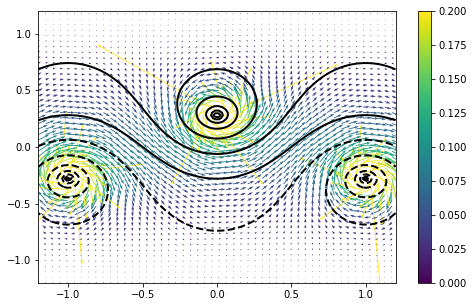

In [25]:
ds  = 2
#plt.ion()
plt.figure(figsize=(8,5))
plt.contour(x,y,psi,15,colors='k',linewidths=2)
Q   = plt.quiver(x[::ds,::ds],y[::ds,::ds],uc[::ds,::ds],vc[::ds,::ds],M[::ds,::ds],cmap='viridis',scale=0.5, scale_units='inches')
plt.colorbar(Q, cmap='viridis')
plt.clim(0,0.2)
